In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import numpy as np
from simtk import unit
import matplotlib.pyplot as plt

_ColormakerRegistry()

In [3]:
molecular_system = msm.convert('pentalanine.h5')

In [4]:
msm.info(molecular_system)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n frames
molsysmt.MolSys,62,7,1,1,1,1,5000


In [5]:
time = msm.get(molecular_system, target='system', time=True)

In [13]:
rmsd = msm.rmsd(molecular_system, selection='backbone', frame_indices=100, reference_frame_index=0)

In [14]:
print(rmsd)

[0.73817043] nm


In [15]:
rmsd = msm.rmsd(molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)

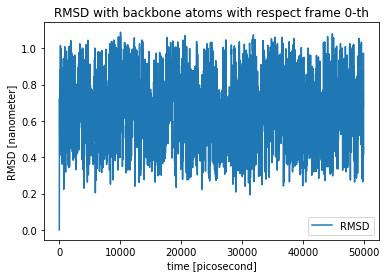

In [16]:
plt.plot(time, rmsd, label='RMSD')
plt.xlabel('time [{}]'.format(time.unit))
plt.ylabel('RMSD [{}]'.format(rmsd.unit))
plt.title('RMSD with backbone atoms with respect frame 0-th')
plt.legend()
plt.show()

In [17]:
molecular_system_1 = msm.extract(molecular_system, frame_indices=range(0,100))
molecular_system_2 = msm.extract(molecular_system, frame_indices=range(200,300))

In [18]:
msm.info(molecular_system_1)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n frames
molsysmt.MolSys,62,7,1,1,1,1,100


In [19]:
msm.info(molecular_system_2)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n frames
molsysmt.MolSys,62,7,1,1,1,1,100


In [24]:
rmsd = msm.rmsd(molecular_system_1, selection='backbone', frame_indices=10,
                reference_item=molecular_system_2, reference_selection='backbone', reference_frame_index=90)

In [25]:
print(rmsd)

[0.45657069] nm


In [26]:
lrmsd = msm.least_rmsd(molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)
rmsd = msm.rmsd(molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)

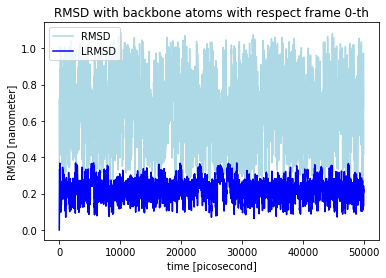

In [27]:
plt.plot(time, rmsd, color='lightblue', label='RMSD')
plt.plot(time, lrmsd, color='blue', label='LRMSD')
plt.xlabel('time [{}]'.format(time.unit))
plt.ylabel('RMSD [{}]'.format(rmsd.unit))
plt.title('RMSD with backbone atoms with respect frame 0-th')
plt.legend()
plt.show()

In [28]:
fitted_molecular_system = msm.least_rmsd_fit(molecular_system, selection='backbone', frame_indices='all',
                                             reference_frame_index=0, to_form='molsysmt.MolSys')

In [29]:
fitted_rmsd = msm.rmsd(fitted_molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)

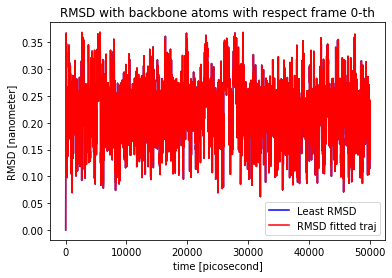

In [30]:
plt.plot(time, lrmsd, color='blue', label='Least RMSD')
plt.plot(time, fitted_rmsd, color='red', label='RMSD fitted traj')
plt.xlabel('time [{}]'.format(time.unit))
plt.ylabel('RMSD [{}]'.format(rmsd.unit))
plt.title('RMSD with backbone atoms with respect frame 0-th')
plt.legend()
plt.show()

In [31]:
msm.least_rmsd_fit(molecular_system, selection='backbone', frame_indices=range(2000,4000), reference_frame_index=0)

In [32]:
fitted_rmsd = msm.rmsd(molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)

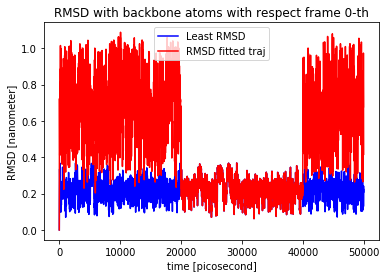

In [33]:
plt.plot(time, lrmsd, color='blue', label='Least RMSD')
plt.plot(time, fitted_rmsd, color='red', label='RMSD fitted traj')
plt.xlabel('time [{}]'.format(time.unit))
plt.ylabel('RMSD [{}]'.format(rmsd.unit))
plt.title('RMSD with backbone atoms with respect frame 0-th')
plt.legend()
plt.show()